In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Setup for nice visuals
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv(r"C:\Users\kotireddy81\OneDrive\Desktop\Kavya\DATA ANALYTICS\Skillcraft internship\train.csv")

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.columns)
print(df.shape)
print(df.isnull().sum())

# Handle missing data WITHOUT inplace to avoid FutureWarning
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')  # ignore if 'Cabin' missing

# Type conversions
df['Survived'] = df['Survived'].astype(int)
df['Pclass'] = df['Pclass'].astype('category')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

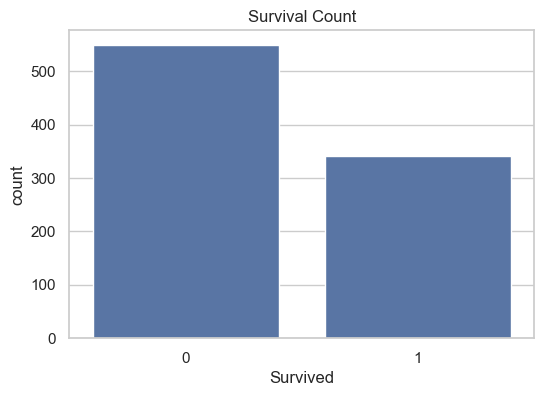

In [51]:
# 1. Survival count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

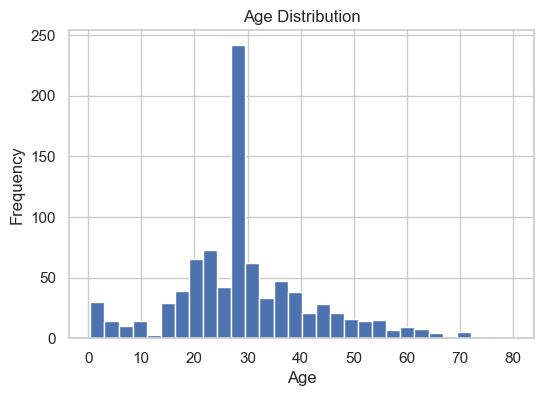

In [52]:
# 2. Age distribution
plt.figure(figsize=(6,4))
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

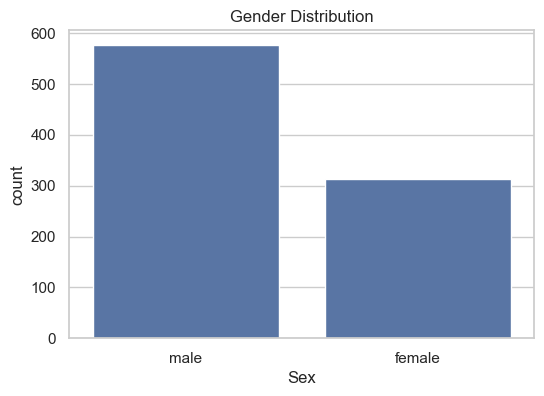

In [53]:
# 3. Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex')
plt.title("Gender Distribution")
plt.show()

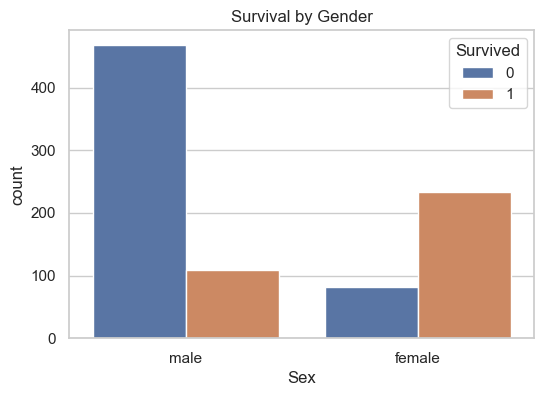

In [54]:

# 4. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

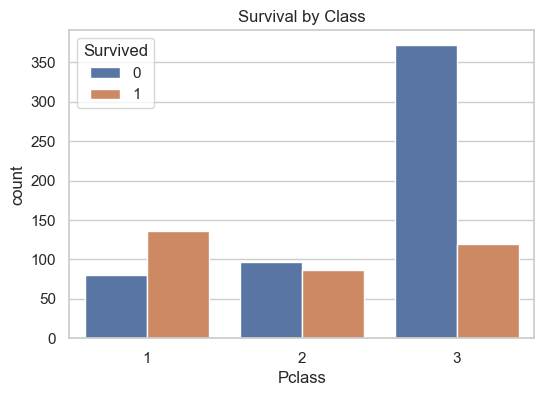

In [55]:
# 5. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()


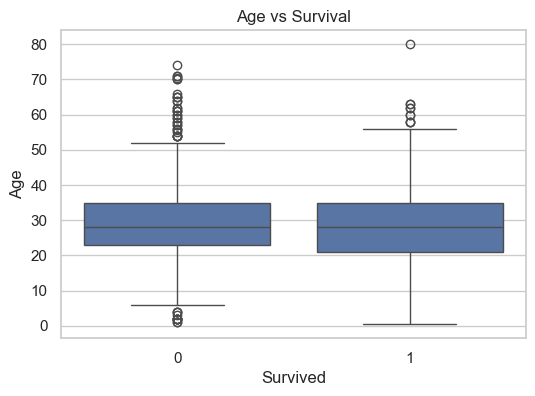

In [56]:
# 6. Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age vs Survival")
plt.show()

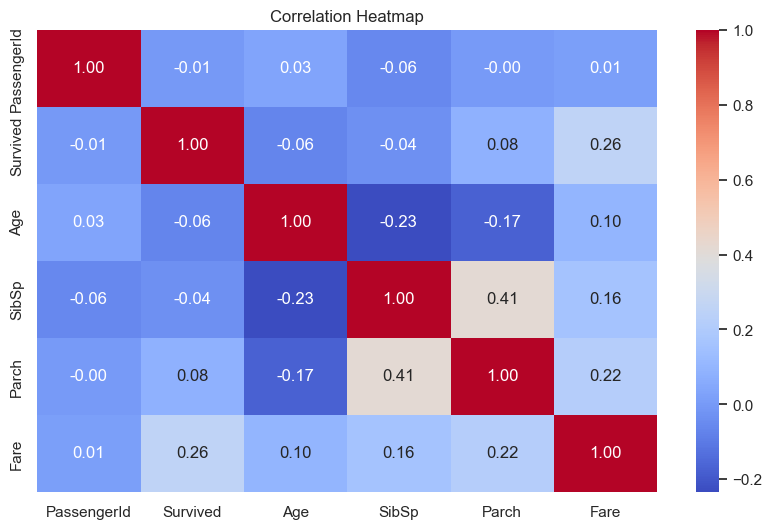

In [57]:
# 7. Correlation Heatmap (only numeric columns)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [58]:
# 8. Average survival rate by gender
print("\nAverage Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())


Average Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
